In [30]:
from urllib.request import urlopen, Request
from bs4 import BeautifulSoup
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from textblob import TextBlob
import pandas as pd
import matplotlib.pyplot as plt

finviz_url = 'https://finviz.com/quote.ashx?t='
tickers = ['AMZN', 'GOOG', 'FB']

news_tables = {}
for ticker in tickers:
    url = finviz_url + ticker

    req = Request(url=url, headers={'user-agent': 'my-app'})
    response = urlopen(req)

    html = BeautifulSoup(response, features='html.parser')
    news_table = html.find(id='news-table')
    news_tables[ticker] = news_table

In [31]:
parsed_data = []

for ticker, news_table in news_tables.items():
    for row in news_table.findAll('tr'):
        title = row.a.text
        date_data = row.td.text.split()

        if len(date_data) == 1:
            time = date_data[0]
        else:
            date = date_data[0]
            time = date_data[1]
        
        parsed_data.append([ticker, date, time, title])

#print(parsed_data)

<Figure size 720x576 with 0 Axes>

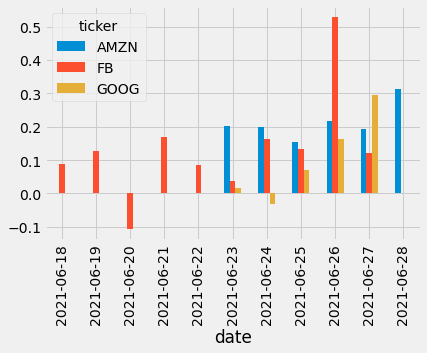

<Figure size 720x576 with 0 Axes>

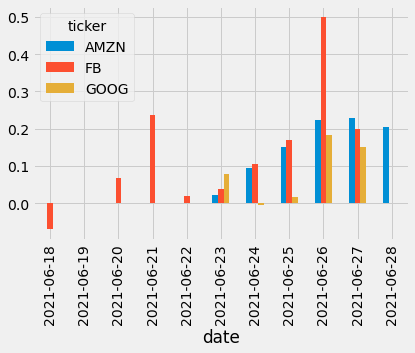

In [40]:
df = pd.DataFrame(parsed_data, columns=['ticker', 'date', 'time', 'title'])
vader = SentimentIntensityAnalyzer()

f = lambda title:vader.polarity_scores(title)['compound']
df['compound'] = df['title'].apply(f)
df['date'] = pd.to_datetime(df.date).dt.date

b = lambda title:TextBlob(title).sentiment.polarity
df['polarity'] = df['title'].apply(b)

plt.figure(figsize=(10,8))
mean_df = df.groupby(['ticker', 'date']).mean().unstack()
mean_df = mean_df.xs('compound', axis='columns').transpose()
mean_df.plot(kind='bar')
plt.show()

plt.figure(figsize=(10,8))
mean_df = df.groupby(['ticker', 'date']).mean().unstack()
mean_df = mean_df.xs('polarity', axis='columns').transpose()
mean_df.plot(kind='bar')
plt.show()

In [42]:
feedback1 = "Food is bad"
feedback2 = "Food is good"
print(TextBlob(feedback1).sentiment)
print(TextBlob(feedback2).sentiment)

Sentiment(polarity=-0.6999999999999998, subjectivity=0.6666666666666666)
Sentiment(polarity=0.7, subjectivity=0.6000000000000001)


In [36]:
print(vader.polarity_scores("I think apple will fail"))

{'neg': 0.538, 'neu': 0.462, 'pos': 0.0, 'compound': -0.5423}
